## 6.2 损失函数性质

上一节咱们讲解了最优化和深度学习的密切关系和区别。简单地说，在深度学习求解损失函数的时候，因为它没有解析解，因此必须借助最优化的算法来逼近求解。这个过程中产生了一系列问题，要一个个的搞定。在讲解具体的最优化算法之前，有必要先充分了解损失函数的各种特点和性质。这就是本节要讲的内容了。

在深度学习中，损失函数是用来衡量预测结果与真实结果之间的差距的函数。损失函数的性质决定了模型的性能和训练效果。

1. 可微性：损失函数应当是可微的，这意味着可以计算出损失函数在任意一点处的导数。可微性是梯度下降法的基本前提，因为梯度下降法需要使用损失函数的导数来更新模型参数。

2. 单调性：损失函数应当具有单调性，即在模型训练过程中，损失函数的值应该逐渐减小。如果损失函数不具有单调性，则模型的训练效果可能会变差。

3. 凸性：损失函数应当是凸的，这意味着其图像在任意两点间连线段上方的区域都是损失函数的图像。凸性是优化算法的基本前提，因为这意味着总存在一个全局最优解。

4. 可分离性：损失函数应当是可分离的，这意味着可以将损失函数分解为每一个输入样本的损失函数之和。可分离性使得我们可以使用梯度下降法来更新模型参数，因为梯度下降法需要对每一个输入样本求和来计算损失函数的总体梯度。

5. 可导性：损失函数应当是可导的，这意味着可以计算出损失函数的导函数。可导性是使用梯度下降法和牛顿法等优化算法的基本前提，因为这些算法需要使用损失函数的导函数来更新模型参数。

6. 可表示性：损失函数应当具有足够的表示能力，即能够准确地表示预测结果与真实结果之间的差距。常用的损失函数包括均方误差、交叉熵损失函数等。

选择合适的损失函数是深度学习模型训练的关键，因两个模型训练出来的结果可能不一样。损失函数的性质决定了模型的性能并影响着模型训练的效果。因此，在选择损失函数时，应该根据问题的特点来选择合适的损失函数。

例如，在回归问题中，常用的损失函数有均方误差（mean squared error，MSE）和平均绝对误差（mean absolute error，MAE）。这两种损失函数都是可微的、可导的、可分离的、单调的和凸的。在分类问题中，常用的损失函数有交叉熵损失函数（cross-entropy loss）和二次损失函数（squared loss）。交叉熵损失函数是一种常用的分类损失函数，它可以表示模型预测结果与真实结果之间的差距。二次损失函数是可微的、可导的、可分离的、单调的和凸的。

对于损失函数的选择，需要根据问题的特点进行分析，选择合适的损失函数才能得到较好的模型性能。

损失函数上面这些性质当中，有的比较好理解我们就没有必要细讲了，着重讲解一下大家比较容易弄混的和不太好理解的概念：先讲讲可微和可导，然后重点讲凸性的问题。

### 6.2.1 可微和可导的区别

可微性（differentiability）和可导性（continuity）是两个概念，它们在数学中有着重要的意义。

可微性指的是函数在任意一点处都有一个导数，即在任意一点处都可以计算出函数的导数。可微函数的导数可以帮助我们更好地理解函数的变化趋势。可导性指的是函数有一个连续的导函数，即在函数的任意一个区间内都可以计算出函数的导函数。因此，可微性和可导性的区别在于，可微性是指函数在任意一点处都有导数，而可导性则是指函数在任意一个区间内都有连续的导函数。

这么说你可能还是不好理解，来，梗直哥给你举个反例就好懂了。来看可微不可导的函数，这类指的是函数在某些点处有导数，但在其他点处没有导数的函数。这类函数的导函数不连续，也就是说，在函数的某些区间内可以计算出导函数，但在其他区间内则不能。例如，在函数 f(x)=|x| 的点 x=0 处，函数的导数为0，但在其他点处，函数的导数为1或-1。因此，函数 f(x)=|x| 既可微（即在任意一点处都有导数），但又不可导（即在任意一个区间内都没有连续的导函数）。另外，还有一类特殊的函数，即在所有点处都没有导数的函数，这类函数既不可微，也不可导。例如，函数 f(x)=x^2sin(1/x) 在 x=0 处的导数无限大，因此函数在任意一点处都没有导数，即不可微。

这么说你理解着还是有点难度，咱们看看它们的函数图像。

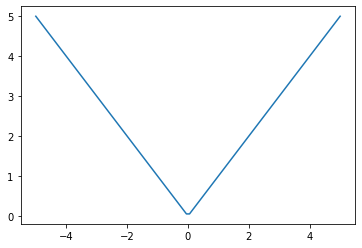

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import torch

def f(x):
    return abs(x)

# 生成输入 x
x = np.linspace(-5, 5, 100)

# 计算函数值
y = [f(xx) for xx in x]

# 可视化函数图像
plt.plot(x, y)
plt.show()


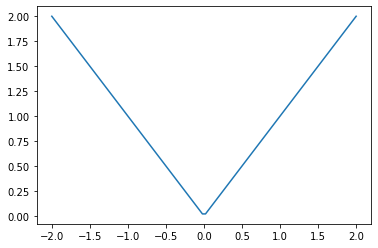

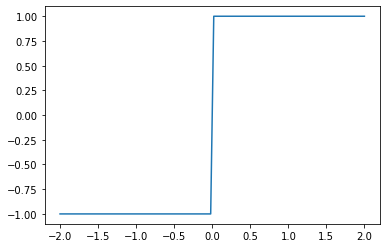

In [1]:
import torch
import matplotlib.pyplot as plt

def abs_function(x):
    return x.abs()

# Generate some data
x = torch.linspace(-2, 2, 100)
x.requires_grad_(True)  # Set x to be a tensor that requires gradients
y = abs_function(x)

# Plot the function
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

# Compute the derivative of the function
y_prime = torch.autograd.grad(y.sum(), x, create_graph=True)[0]


# Plot the derivative
plt.plot(x.detach().numpy(), y_prime.detach().numpy())
plt.show()


关于函数 y=|x| 的导数，请注意，当 x<0 时，导数为 -1；当 x>0 时，导数为 1；当 x=0 时，导数不存在。因此，导数图像应该在 x=0 处断开。

### 6.2.2 凸性

在优化算法设计中，凸性是指函数图像的凸度或凸度方向。优化算法通常用于最小化或最大化一个目标函数，因此损失函数的凸性可能会影响优化算法的性能。凸函数是指在所有点处都向上弯曲的函数，类似于弯曲的桥身。而凹函数则是指在所有点处都向下弯曲的函数，类似于弯曲的河床。

凸函数的定义为：设函数 $f(x)$ 为定义在区间 $[a,b]$ 上的连续函数，若对于任意的 $x_1,x_2 \in [a,b]$，有 $f((1-t)x_1 + tx_2) \leq (1-t)f(x_1) + tf(x_2)$（$t \in [0,1]$），则称函数 $f(x)$ 为凸函数。

而凹函数可以表示为：设函数 $f(x)$ 为定义在区间 $[a,b]$ 上的连续函数，若对于任意的 $x_1,x_2 \in [a,b]$，有 $f((1-t)x_1 + tx_2) \geq (1-t)f(x_1) + tf(x_2)$（$t \in [0,1]$），则称函数 $f(x)$ 为凹函数。

#### 损失函数凸性为什么重要？

在深度学习中，凸性是很重要的一个因素，因为它可以帮助我们确定使用哪种优化算法来最小化模型的损失函数。如果损失函数是凸的，则意味着在函数的所有点处都是向上弯曲的。这表明，对于任意给定的自变量值，损失函数都有一个单谷，即使在函数的多个局部最小值处也是如此。这意味着我们可以使用最优化算法来找到函数的全局最小值，因为最优化算法可以避免停留在局部最小值处。例如，梯度下降法是一种常见的最优化算法，它通过不断沿着负梯度方向更新自变量的值来最小化目标函数。如果目标函数是凸的，则梯度下降法可以有效地找到函数的全局最小值。

但是，有时损失函数并不是凸函数。例如，当模型中使用了 ReLU 激活函数时，损失函数可能是凹函数。在这种情况下，简单的优化算法可能无法有效地最小化损失函数，因为它们可能会被“卡”在局部最小值处。如果损失函数是凹的，则意味着在函数的所有点处都是向下弯曲的。这表明，对于任意给定的自变量值，损失函数都可能有多个局部最小值。最优化算法可能会停留在局部最小值处，而无法找到函数的全局最小值。因此，在优化算法设计中，对于凹函数，我们通常需要使用更复杂的最优化算法，如拟牛顿法或共轭梯度法，才能有效地找到函数的全局最小值。这些算法使用二阶信息来调整自变量的值，从而使得最优化算法更加稳定并能够跳出局部最小值。另外，还有一些最优化算法，如遗传算法和随机梯度下降法，可以用于优化凹函数。但是，这些算法通常不如拟牛顿法或共轭梯度法那样高效，并且对于高维函数的优化效果可能较差。

总之，凸性是优化算法设计中一个重要的考虑因素。对于凸函数，可以使用较简单的最优化算法来最小化目标函数；对于凹函数，则需要使用更复杂的最优化算法来最小化目标函数。

#### 怎么确定损失函数的凸性呢？

讲到这，你肯定好奇，那怎么判断一个损失函数的凸性呢？这方法可就多了，举几个例子吧。更复杂的方法你如果感兴趣，可以选修更高阶的课程。

要确定损失函数的凸性，可以使用以下方法之一：

1. 直接求解二阶导数：通过计算损失函数的二阶导数，可以直接判断损失函数是否是凸函数。如果损失函数的二阶导数大于 0，则损失函数是凸函数；如果损失函数的二阶导数小于 0，则损失函数是凹函数；如果损失函数的二阶导数等于 0，则损失函数是平函数。

2. 使用凸性定理：凸性定理是一个经典的定理，它可以帮助我们判断函数的凸性。根据凸性定理，如果一个函数的二阶导数大于 0，则该函数是凸函数；如果一个函数的二阶导数小于 0，则该函数是凹函数；如果一个函数的二阶导数等于 0，则该函数可能是凸函数也可能是凹函数。

3. 可视化函数：可以使用可视化工具，如 Matplotlib 或 Plotly，来绘制损失函数的图像。通过观察图像，可以直接判断损失函数是否是凸函数。

4. 枚举自变量的值：可以尝试枚举自变量的值，计算损失函数的值。如果损失函数的值是单调递增或单调递减的，则损失函数是凸函数；如果损失函数的值存在局部最小值或局部最大值，则损失函数是凹函数。

#### 凸约束和凸优化是什么关系？

我们知道损失函数是可以带有约束条件的。因此凸约束和凸优化有密切联系，但是并不是同一个概念。凸约束是指在优化问题中，约束条件是凸函数的情况。这意味着，对于给定的自变量，约束条件的值是单调递增或单调递减的。例如，当约束条件为 $x^2 \leq 1$ 时，约束条件是凸函数。凸优化是指使用凸优化算法来最小化凸函数的优化问题。凸优化算法是指那些只能处理凸函数的优化算法。例如，梯度下降法和共轭梯度法都是凸优化算法。总之，凸约束是指优化问题中的约束条件是凸函数，而凸优化是指使用凸优化算法来最小化凸函数的优化问题。

#### 一阶信息和二阶信息区别是什么

上面我们提到了一阶信息和二阶信息，它们具体啥意思呢？
一阶信息通常指的是目标函数的导数，即梯度。使用一阶信息的优化算法，如梯度下降法，是通过计算目标函数的梯度来调整自变量的值，从而使得目标函数取到最小值。二阶信息通常指的是目标函数的二阶导数，即海森矩阵或共轭梯度。使用二阶信息的优化算法，如拟牛顿法和共轭梯度法，是通过计算目标函数的海森矩阵或共轭梯度来调整自变量的值，从而使得目标函数取到最小值。相比较而言，使用二阶信息的优化算法通常更加精确，但同时也更加复杂。因此，我们通常会根据问题的具体情况来选择使用一阶信息还是二阶信息。

#### Jensen不等式的重要性

Jensen's inequality 是一个数学定理，与凸函数密切相关，在最优化中很有用。具体来说，如果 $f(x)$ 是一个凸函数，并且 $x_1, x_2, \dots, x_n$ 是给定的值，则有：

$$ f\left(\frac{x_1+x_2+\dots+x_n}{n}\right) \leq \frac{f(x_1)+f(x_2)+\dots+f(x_n)}{n} $$

这意味着，对于给定的凸函数 $f(x)$ 和给定的值 $x_1, x_2, \dots, x_n$，$f(x)$ 的平均值小于或等于 $x_1, x_2, \dots, x_n$ 的平均值。换句话说，它给了我们一个下界，可以帮助我们求解最优化问题，因为我们知道最优解 $x^*$ 不会比下界更大。也就是说，如果我们能够找到一个 $x$，使得 $f(x)$ 小于等于这个下界，那么这个 $x$ 就是最优解。

这个定理最初由丹麦数学家J.L.W.V. Jensen在1906年提出，因此得名。Jensen 不等式的历史可以追溯到19世纪末，当时数学家们正在研究凸函数的性质。1890年，德国数学家Gustav Kirchhoff提出了凸性不等式，这个不等式描述了一个函数的平均值与其最大值之间的关系。在1906年，Jensen 在他的论文《Om mengder af reelle Tall》（关于实数集合的论文）中提出了一个更一般的不等式，称为 Jensen 不等式。这个不等式描述了一个函数与其平均值之间的关系，并且不限于凸函数。Jensen 不等式在过去的几十年里广泛应用，并被用于许多不同的领域，包括信息论、机器学习、信号处理和计算机科学等。它也被用作数学优化中的一种工具，用于证明最优化问题的最优性。

**梗直哥提示：这部分内容对数学基础的要求比较高，如果底子不是很扎实的话，理解起来是比较困难的。不过，这取决于你的目标是什么，如果仅仅是入门深度学习，可以暂时跳过去；如果是想深入理解算法背后的原理，那就应该搞明白；如果你正在科研，或者看一些关于变分推断方面的算法，那这部分内容就很关键了。篇幅关系，这里难以同时满足所有同学的需求，可以入群（微信：gengzhige99）,也欢迎来选修我们深度学习的进阶课程。**

[Next 6-3 梯度下降](./6-3%20梯度下降.ipynb)

[]()